# Previsão do Preço de Casas

## Introdução

Este conjunto de dados sintéticos foi projetado para tarefas de regressão em ciência de dados, especificamente para prever preços de imóveis. Ele simula um mercado imobiliário real com 10.000 observações e 13 características, incluindo variáveis numéricas, ordinais e categóricas, tornando-o ideal para praticar limpeza de dados, engenharia de características e modelagem de regressão avançada (por exemplo, regressão linear, florestas aleatórias, reforço de gradiente).

A variável-alvo (price_k_usd) foi gerada com base em relações realistas e ponderadas com as características independentes, garantindo uma estrutura de correlação forte, mas ruidosa, semelhante aos dados reais do mercado.

## Análise Exploratória de Dados (EDA)

Para começarmos nosso projeto, vamos dar uma detalhada em cada coluna e cada dado do nosso DataFrame para depois criarmos nosso modelo mediante as observações.

In [1]:
# Importando bibliotecas necessárias
import pandas as pd # Manipulação do DataFrame
import numpy as np # Manipulação numéricas
import matplotlib.pyplot as plt # Visualização dos dados

# Importando o DataFrame
housing = pd.read_csv('house_prices.csv')

# Visualizando as 5 primeiras linhas
housing.head()

,house_id,square_footage,number_of_rooms,number_of_bathrooms,lot_size_sqft,distance_to_city_center_km,year_built,has_garage,quality_score,school_rating,building_material,heating_type,price_k_usd
0,1000,1660,4,2.5,13501,28.8,2015,Yes,8,5,Stone,Gas,1077.78
1,1001,4572,5,3.5,10010,24.0,1986,No,6,4,Brick,Gas,1165.15
2,1002,3892,2,2.5,7959,12.6,1973,Yes,5,4,Wood,Electric,1077.08
3,1003,1266,4,2.0,9269,29.5,2011,Yes,5,4,Brick,Gas,919.52
4,1004,4244,5,2.5,9692,11.0,1970,Yes,3,2,Brick,Gas,1073.88


### Informações Gerais

In [2]:
# Número de linhas e colunas
print(f"Dimensões do dataset: {housing.shape[0]} linhas e {housing.shape[1]} colunas")
# Total de dados
print(f"Total de registros: {housing.shape[0]:,}")
# Tipos de dados presentes no DataFrame
print(f"\nTIPOS DE DADOS:\n")
print(housing.dtypes)
# Contagem de valores nulos
print(f"\nVALORES FALTANTES:\n")
print(housing.isnull().sum())

Dimensões do dataset: 10000 linhas e 13 colunas
Total de registros: 10,000

TIPOS DE DADOS:

house_id                        int64
square_footage                  int64
number_of_rooms                 int64
number_of_bathrooms           float64
lot_size_sqft                   int64
distance_to_city_center_km    float64
year_built                      int64
has_garage                     object
quality_score                   int64
school_rating                   int64
building_material              object
heating_type                   object
price_k_usd                   float64
dtype: object

VALORES FALTANTES:

house_id                      0
square_footage                0
number_of_rooms               0
number_of_bathrooms           0
lot_size_sqft                 0
distance_to_city_center_km    0
year_built                    0
has_garage                    0
quality_score                 0
school_rating                 0
building_material             0
heating_type              

Podemos observar que não há valores nulos (Otimo") e há três colunas categóricas (texto) e dez colunas numéricas.

### Informações Descritivas

housing.describe()

Nosso DataFrame está bastante diversificado quanto aos seus dados. Podemos observar que todas as colunas estão com dados balanceados, visto que tanto a média quanto a mediana estão próximas.</br>
Adentrando nas características da casa, observamos que a maioria das casas obtém de 3 a 4 comôdos, pelo menos 2 banheiros, uma distância média do centro de 15km e utilizam gás ou eletricidade como forma de aquecimento. No que diz respeito ao ano de construção, temos a cas mais velha sendo construída em 1950 e a mais recente em 2023, tendo como a maioria sendo construída em 1987.

### Análise da Variável Alvo: Preço das Casas

Dado uma olhada nas informações técnicas dos dados, vamos partir para a análise das colunas com nossa coluna alvo *'price_k_usd'*.

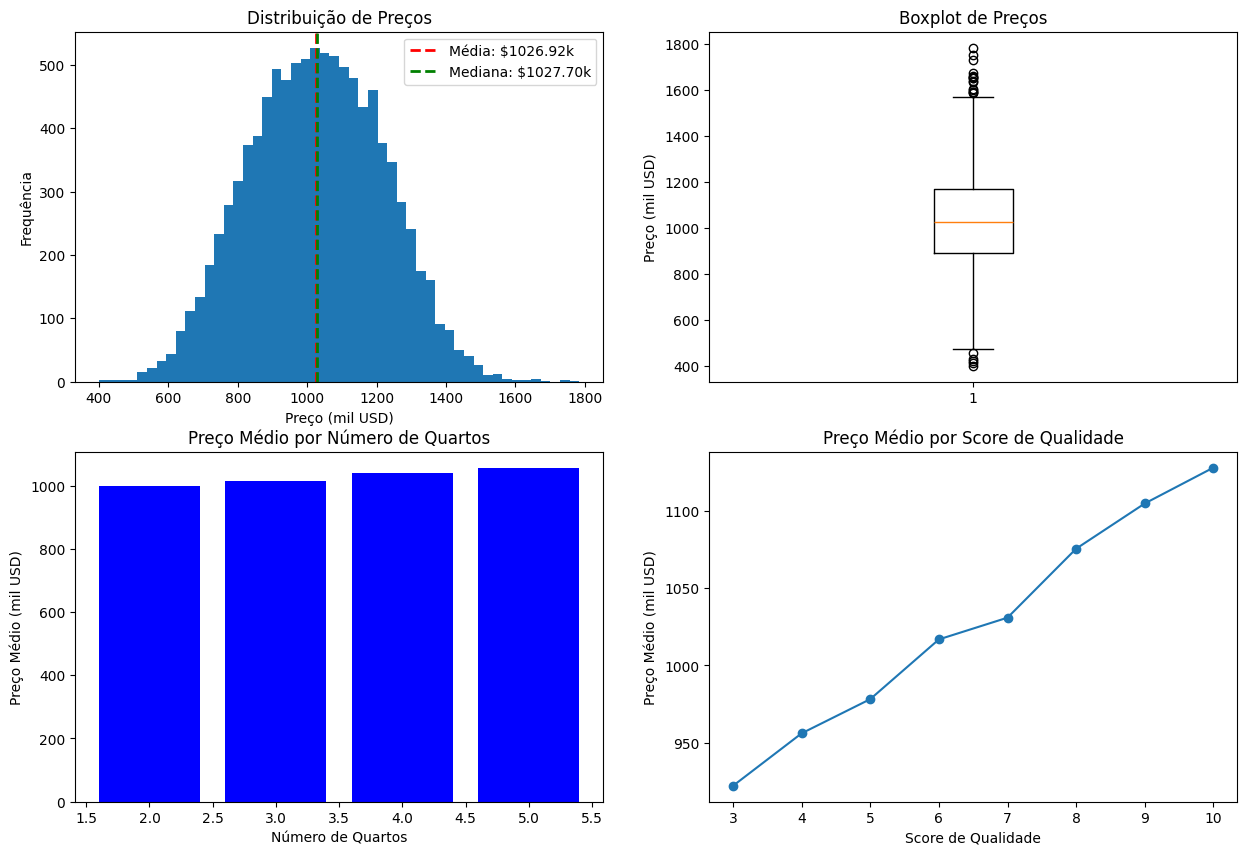

In [3]:
# Configurando nossa moldura
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histograma do preço médio em relacão a mediana e média
axes[0, 0].hist(housing['price_k_usd'], bins=50)
# Adicionando uma linha vertical da média
axes[0, 0].axvline(housing['price_k_usd'].mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Média: ${housing["price_k_usd"].mean():.2f}k')
# Adicionando uma linha vertical da mediana
axes[0, 0].axvline(housing['price_k_usd'].median(), color='green', linestyle='--', 
                   linewidth=2, label=f'Mediana: ${housing["price_k_usd"].median():.2f}k')
axes[0, 0].set_xlabel('Preço (mil USD)') # Adicionando título ao eixo x
axes[0, 0].set_ylabel('Frequência') # Adicionando título ao eixo y
axes[0, 0].set_title('Distribuição de Preços') # Adicionando título ao gráfico
axes[0, 0].legend() # Mostrando a legenda

# Boxplot do 'price_k_usd' para verificação de outliers
axes[0, 1].boxplot(housing['price_k_usd'])
axes[0, 1].set_ylabel('Preço (mil USD)') # Adicionando título ao eixo y
axes[0, 1].set_title('Boxplot de Preços') # Adicionando título ao gráfico

# Preço por número de quartos
price_by_rooms = housing.groupby('number_of_rooms')['price_k_usd'].mean() # Agrupando preço por número de quartos
axes[1, 0].bar(price_by_rooms.index, price_by_rooms.values, color='blue')
axes[1, 0].set_xlabel('Número de Quartos') # Adicionando título ao eixo x
axes[1, 0].set_ylabel('Preço Médio (mil USD)') # Adicionando título ao eixo y
axes[1, 0].set_title('Preço Médio por Número de Quartos') # Adicionando título ao gráfico

# Preço por qualidade
price_by_quality = housing.groupby('quality_score')['price_k_usd'].mean() # Agrupando preço por qualidade da casa
axes[1, 1].plot(price_by_quality.index, price_by_quality.values, marker='o')
axes[1, 1].set_xlabel('Score de Qualidade') # Adicionando título ao eixo x
axes[1, 1].set_ylabel('Preço Médio (mil USD)') # Adicionando título ao eixo y
axes[1, 1].set_title('Preço Médio por Score de Qualidade') # Adicionando título ao gráfico

# Exibindo o gráfico
plt.show()

### Análise das Variavéis Categegóricas

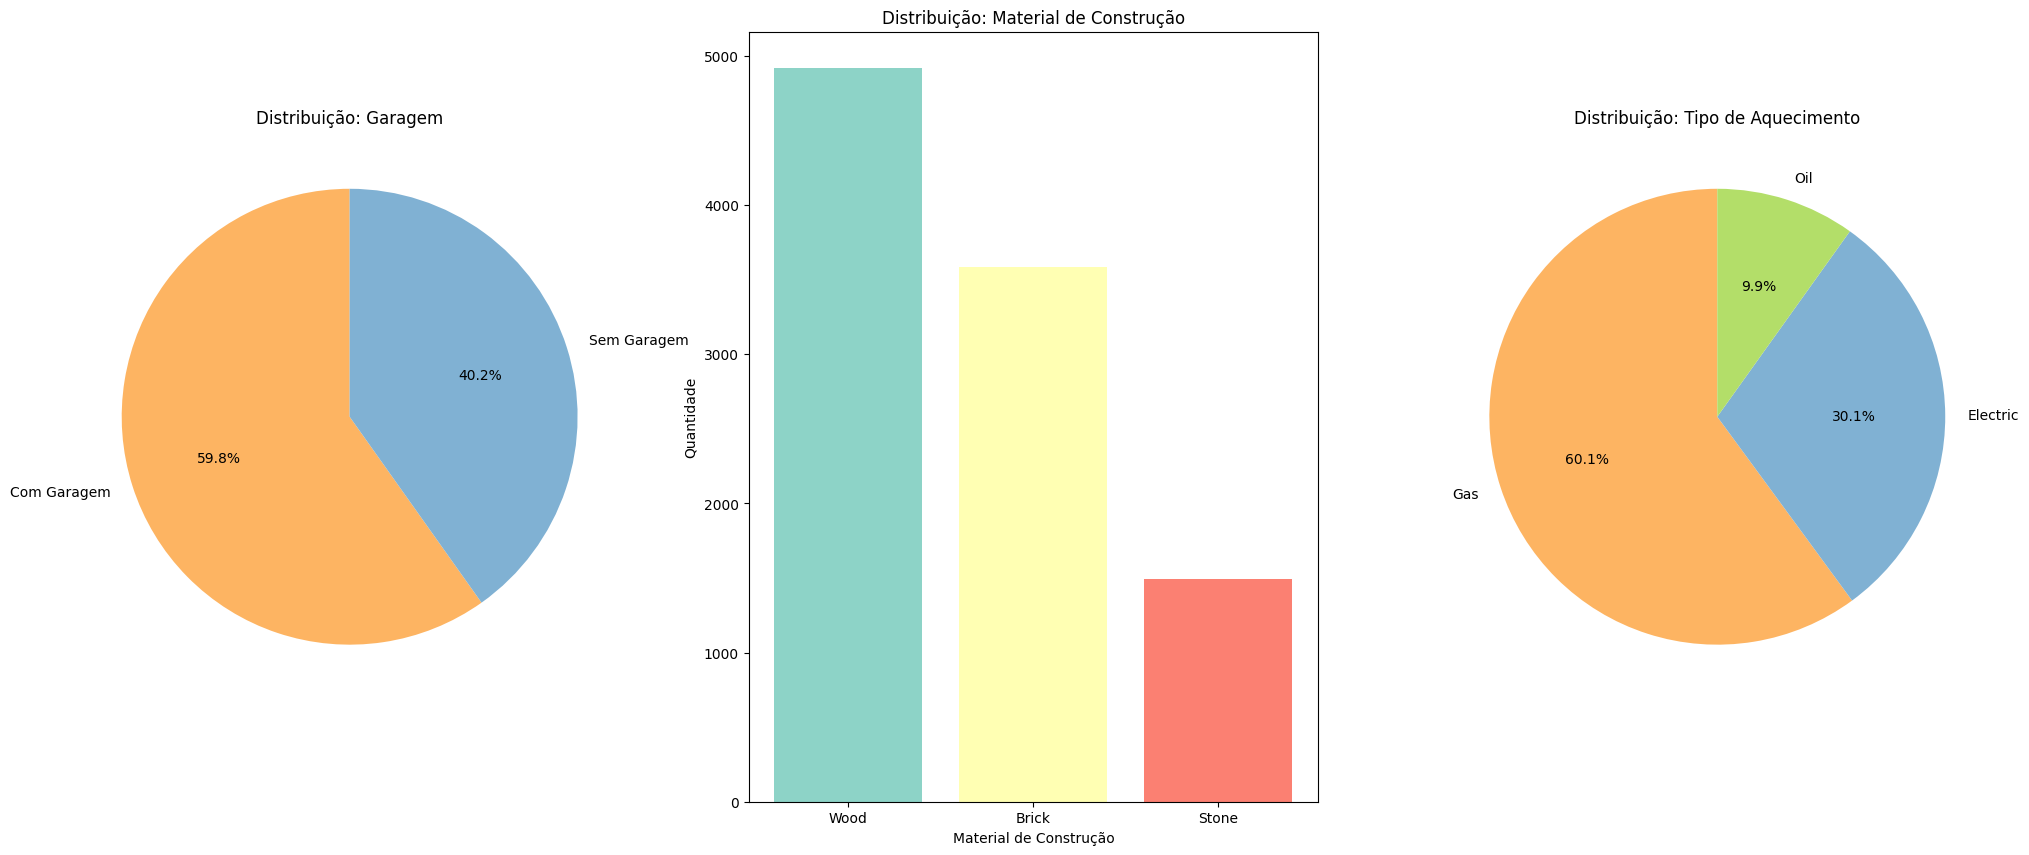

<Figure size 640x480 with 0 Axes>

In [11]:
# Configurando nossa moldura
fig, axes = plt.subplots(1, 3, figsize=(25, 10))

# Coluna: 'Has Garage'
garage_counts = housing['has_garage'].value_counts() # Contagem de tem ou não garagem
# Criando gráfico de fatia
axes[0].pie(garage_counts, labels=['Com Garagem', 'Sem Garagem'], autopct='%1.1f%%',
               colors=['#fdb462', '#80b1d3'], startangle=90)
axes[0].set_title('Distribuição: Garagem') # Adicionando título ao gráfico

# Coluna: 'Building Material'
material_counts = housing['building_material'].value_counts() # Contagem por material
# Criando gráfico de barras
axes[1].bar(material_counts.index, material_counts.values, color=['#8dd3c7', '#ffffb3', '#fb8072'], )
axes[1].set_xlabel('Material de Construção') # Adicionando título ao eixo x
axes[1].set_ylabel('Quantidade') # Adicionando título ao eixo y
axes[1].set_title('Distribuição: Material de Construção') # Adicionando título ao gráfico

# Coluna: 'Heating Type'
heating_counts = housing['heating_type'].value_counts() # Contagem por tipo de aquecimento
# Criando gráfico de fatia
axes[2].pie(heating_counts, labels=heating_counts.index, autopct='%1.1f%%',
               colors=['#fdb462', '#80b1d3', '#b3de69'], startangle=90)
axes[2].set_title('Distribuição: Tipo de Aquecimento') # Adicionando título ao gráfico

# Mostrando os gráficos
plt.show()



####

In [5]:
# Olhando os valores únicos da coluna 'building material' e 'heating_type'
print(housing['building_material'].unique())
print(housing['heating_type'].unique())

['Stone' 'Brick' 'Wood']
['Gas' 'Electric' 'Oil']


Nas colunas categóricas observa-se que há três colunas distintas. Em *'has_garage'* temos apenas duas opções, tem ou não garagem. Porém nas coluna *'building_material'* e *'heating_type'* temos mais de uma opção, o que sugere tratamento diferente para cada coluna.</br> Para resolver isso pensei em criar colunnas dummy(0 ou 1) para cada categoria dos dados.

In [12]:
# Criando as colunas dummies

# Colunas 'Stone', 'Brick' e 'Wood' para 'building_material'
housing['Stone'] = housing['building_material'].replace({'Stone': 1, 'Brick': 0, 'Wood': 0}) 
housing['Brick'] = housing['building_material'].replace({'Stone': 0, 'Brick': 1, 'Wood': 0}) 
housing['Wood'] = housing['building_material'].replace({'Stone': 0, 'Brick': 0, 'Wood': 1}) 
# Colunas 'Gas', 'Eletric' e 'Oil' para 'heating_type'
housing['Gas'] = housing['heating_type'].replace({'Gas': 1, 'Electric': 0, 'Oil': 0}) 
housing['Electric'] = housing['heating_type'].replace({'Gas': 0, 'Electric': 1, 'Oil': 0}) 
housing['Oil'] = housing['heating_type'].replace({'Gas': 0, 'Electric': 0, 'Oil': 1})

# Excluindo as colunas 
housing = housing.drop(columns=['heating_type', 'building_material'])

# Verificando o novo dataset
housing.head()


C:\Users\55329\AppData\Local\Temp\ipykernel_13172\2494386805.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housing['Stone'] = housing['building_material'].replace({'Stone': 1, 'Brick': 0, 'Wood': 0})
C:\Users\55329\AppData\Local\Temp\ipykernel_13172\2494386805.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housing['Brick'] = housing['building_material'].replace({'Stone': 0, 'Brick': 1, 'Wood': 0})
C:\Users\55329\AppData\Local\Temp\ipykernel_13172\2494386805.py:6: FutureWarning: Downcasting behavior in `replace` is depre

,square_footage,number_of_rooms,number_of_bathrooms,lot_size_sqft,distance_to_city_center_km,year_built,has_garage,quality_score,school_rating,price_k_usd,Stone,Brick,Wood,Gas,Electric,Oil
0,1660,4,2.5,13501,28.8,2015,Yes,8,5,1077.78,1,0,0,1,0,0
1,4572,5,3.5,10010,24.0,1986,No,6,4,1165.15,0,1,0,1,0,0
2,3892,2,2.5,7959,12.6,1973,Yes,5,4,1077.08,0,0,1,0,1,0
3,1266,4,2.0,9269,29.5,2011,Yes,5,4,919.52,0,1,0,1,0,0
4,4244,5,2.5,9692,11.0,1970,Yes,3,2,1073.88,0,1,0,1,0,0


In [7]:
# Informações técnicas do DataFrame
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   house_id                    10000 non-null  int64  
 1   square_footage              10000 non-null  int64  
 2   number_of_rooms             10000 non-null  int64  
 3   number_of_bathrooms         10000 non-null  float64
 4   lot_size_sqft               10000 non-null  int64  
 5   distance_to_city_center_km  10000 non-null  float64
 6   year_built                  10000 non-null  int64  
 7   has_garage                  10000 non-null  object 
 8   quality_score               10000 non-null  int64  
 9   school_rating               10000 non-null  int64  
 10  building_material           10000 non-null  object 
 11  heating_type                10000 non-null  object 
 12  price_k_usd                 10000 non-null  float64
dtypes: float64(3), int64(7), object(

Não há colunas com dados nulos, sendo 3 colunas categóricas e 10 numéricas.

In [8]:
# Informações estatísticas das colunas
housing.describe()

,house_id,square_footage,number_of_rooms,number_of_bathrooms,lot_size_sqft,distance_to_city_center_km,year_built,quality_score,school_rating,price_k_usd
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5999.50000,2906.349800,3.506800,2.277100,9523.834300,15.497810,1986.791200,6.508800,3.006800,1026.916494
std,2886.89568,1207.433822,1.114127,0.796322,3185.060018,8.362935,21.351946,2.287498,1.424485,192.863307
min,1000.00000,801.000000,2.000000,1.000000,4000.000000,1.000000,1950.000000,3.000000,1.000000,400.100000
25%,3499.75000,1847.500000,3.000000,2.000000,6774.750000,8.300000,1968.000000,4.000000,2.000000,889.025000
50%,5999.50000,2905.000000,4.000000,2.000000,9568.000000,15.400000,1987.000000,6.000000,3.000000,1027.705000
75%,8499.25000,3963.250000,5.000000,3.000000,12314.750000,22.700000,2005.000000,9.000000,4.000000,1167.295000
max,10999.00000,4999.000000,5.000000,4.000000,14999.000000,30.000000,2023.000000,10.000000,5.000000,1784.320000


## Modelo

In [13]:
# Importando bibliotecas necessárias
from sklearn.model_selection import train_test_split # Função para separar em treino e teste
from sklearn.linear_model import LinearRegression  # Importando o modelo de Regressão Linear
from sklearn.preprocessing import OneHotEncoder, StandardScaler # Funções para tratamento dos dados
from sklearn.compose import ColumnTransformer # Função para tratar as colunas
from sklearn.pipeline import Pipeline # Função para criar um pipeline dos dados

# Excluindo a coluna 'house_id'
housing = housing.drop(columns=['house_id'])

# Selecionando features e target
X = housing.drop(columns=['price_k_usd']) # features
y = housing['price_k_usd'] # target

# Separando colunas categóricas das numéricas
numerical_columns = [
    'square_footage', 'lot_size_sqft' 
] # Colunas numéricas		
categorical_features = ['has_garage'] # Colunas categóricas

# Instanciando as tranformações
preprocessing = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_features),
                   ('num', StandardScaler(), numerical_columns)],
                  remainder='passthrough'
)

# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printando as divisões
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

KeyError: "['house_id'] not found in axis"

In [10]:
# Criando o pipeline dos dados
pipeline = Pipeline(steps=[
    ('processor', preprocessing),
    ('model', LinearRegression())]
)

# Treinando o modelo
pipeline.fit(X_train, y_train)

# Prevendo
y_pred = pipeline.predict(X_test)

ValueError: could not convert string to float: 'Brick'

### Avaliação do modelo

In [ ]:
# Importando as métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Instanciando as funções
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mrse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printando os resultados
print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'mrse: {mrse}')
print(f'mape: {mape}')
print(f'R-Quadrado: {r2}')

In [ ]:
# Plotar a comparação entre real vs previsto
plt.scatter(y_test, y_pred, alpha=0.6)

# Linha de referência ideal (y = x)

plt.plot([y_test.min(), y_pred.max()], [y_test.min(), y_pred.max()], color='red', linestyle='-', linewidth=2)

plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Real vs Previsto')
plt.show()

# Conclusão

Olhando o gráfico de dispersão, podemos ver que os valores estão próximos das previsões perfeitas. Nosso modelo é limitado em dados (poucos registros) o que não ajuda a criar um modelo bom e eficientemente preditivo. Para concluir, podemos observar que o modelo não obteve *underfitting* ou *overfitting*, visto que o gráfico apresenta uma distribuição uniforme e perto da "reta perfeita" do modelo, logo criamos um modelo forte e preditivo, porém necessitando de mais dados para validação de tal.

# Considerações finais

Este projeto foi desfiador, porém consegui aplicar alguns conceitos que aprendi e estudar outros novos. Creio que irei atualizá-lo em breve, conforme for descobrindo novas técnicas e modelos mais eficientes, por enquanto, fica esta apresentação do jeito que está! </br>
Lembrando que sou estudante de ciência de dados e ***qualquer crítica construtiva será bem-vinda!*** Quero sempre aprender e aprimorar minhas habilidades. No mais, deixo minhas redes sociais para quem deseja me conhecer melhor: </br>
[Linkedin](www.linkedin.com/in/leonam-cassemiro) | [GitHub](https://github.com/leonamcassemir0) | [Instagram](https://www.instagram.com/leonam.ds)